In [1]:

import torch, sys, platform
print("Python:", sys.version)
print("PyTorch:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    import subprocess, textwrap
    try:
        print(subprocess.check_output(["nvidia-smi"]).decode())
    except Exception as e:
        print("nvidia-smi not found:", e)



Python: 3.10.18 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:08:55) [MSC v.1929 64 bit (AMD64)]
PyTorch: 2.0.1
CUDA available: True
Fri Aug 15 18:55:35 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.70                 Driver Version: 560.70         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3070 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   56C    P0             28W /   91W |       0MiB /   8192MiB |      0%      Default |

Using device: cuda


Using cache found in C:\Users\yutse/.cache\torch\hub\intel-isl_MiDaS_master
Using cache found in C:\Users\yutse/.cache\torch\hub\intel-isl_MiDaS_master


Image loaded: ../dataset/S__61571147.jpg


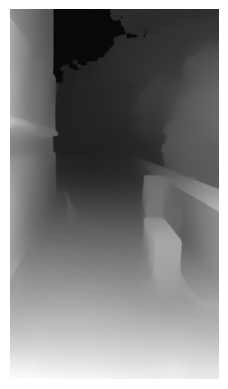

In [3]:
import cv2
import torch
import urllib.request

import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# ---- Load MiDaS (DPT_Hybrid) and its transform
midas = torch.hub.load("intel-isl/MiDaS", "DPT_Hybrid").to(device).eval()
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.dpt_transform
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()



img_path = "../dataset/S__61571147.jpg"
print("Image loaded:", img_path)

# Read and convert to RGB
bgr = cv2.imread(img_path); assert bgr is not None, "Failed to read image."
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

input_batch = transform(rgb).to(device)

# ==============================================
with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=rgb.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()

plt.imshow(output, cmap="gray")
plt.axis("off")
plt.show()